In [1]:
from datetime import datetime
import numpy as np
import time
import cartopy.crs as ccrs
import cartopy.feature as feat
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import matplotlib.path as mpath
import pandas as pd
from metpy.units import units
from siphon.catalog import TDSCatalog
from siphon.ncss import NCSS
from metpy.calc import get_wind_components,  reduce_point_density
from metpy.plots.wx_symbols import current_weather, current_weather_auto, sky_cover
from metpy.plots import StationPlot
from os.path import expanduser
import os

In [2]:
lons = np.linspace(-8,1,10)
lats = np.linspace(50.5,58,10)
Temp = np.random.randint(-10,10,size=(10))
TT = pd.DataFrame()
TT['Temperature'] = Temp
TT['lons'] = lons
TT['lats'] = lats

In [3]:
TT

,Temperature,lons,lats
0,-5,-8.0,50.500000
1,-2,-7.0,51.333333
2,9,-6.0,52.166667
3,-2,-5.0,53.000000
4,5,-4.0,53.833333
5,4,-3.0,54.666667
6,-10,-2.0,55.500000
7,6,-1.0,56.333333
8,-1,0.0,57.166667
9,4,1.0,58.000000


CPU times: user 36 ms, sys: 0 ns, total: 36 ms
Wall time: 34.4 ms


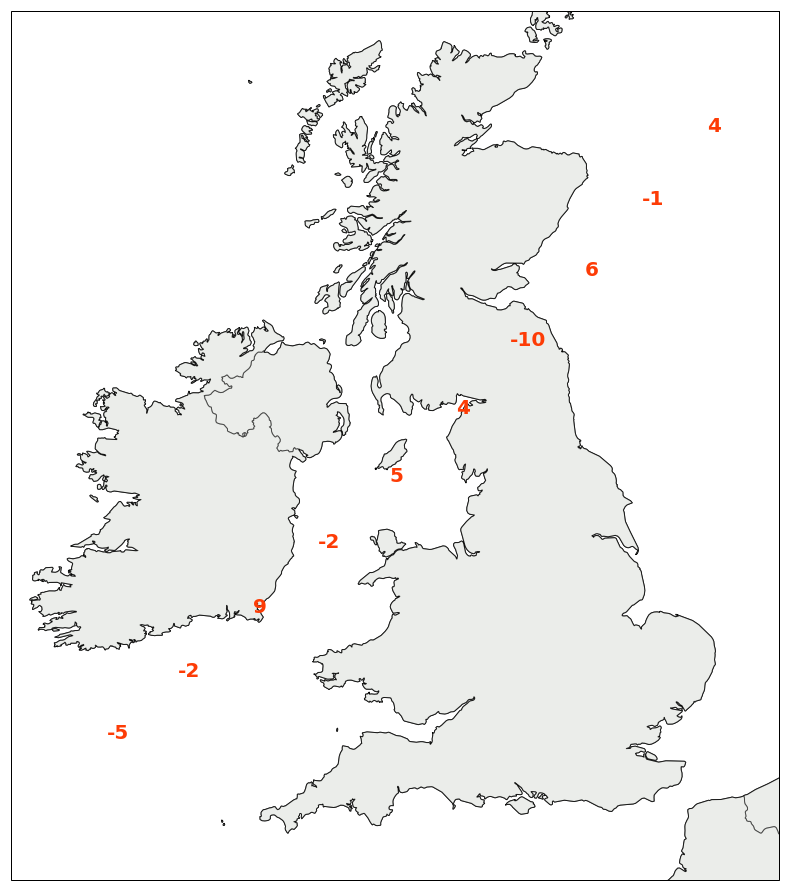

In [4]:
%%time
proj = ccrs.LambertConformal(central_longitude=13, central_latitude=47,
                             standard_parallels=[35])
fig = plt.figure(figsize=(20, 16))
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.set_extent((-10.1,1.8,50.1, 58.4))
state_boundaries = feat.NaturalEarthFeature(category='cultural',
                                            name='admin_0_countries',
                                            scale='10m',
                                            facecolor='#d8dcd6',
                                            alpha=0.5)
ax.coastlines(resolution='10m', zorder=1, color='black')
ax.add_feature(state_boundaries, zorder=1, edgecolor='black')
stationplot = StationPlot(ax, TT['lons'],
                          TT['lats'], clip_on=True,
                          transform=ccrs.PlateCarree(), fontsize=20)
T = stationplot.plot_parameter('NW', TT['Temperature'],
                               color='#fd3c06',
                               fontweight='bold', zorder=2000)

CPU times: user 44 ms, sys: 0 ns, total: 44 ms
Wall time: 40.8 ms


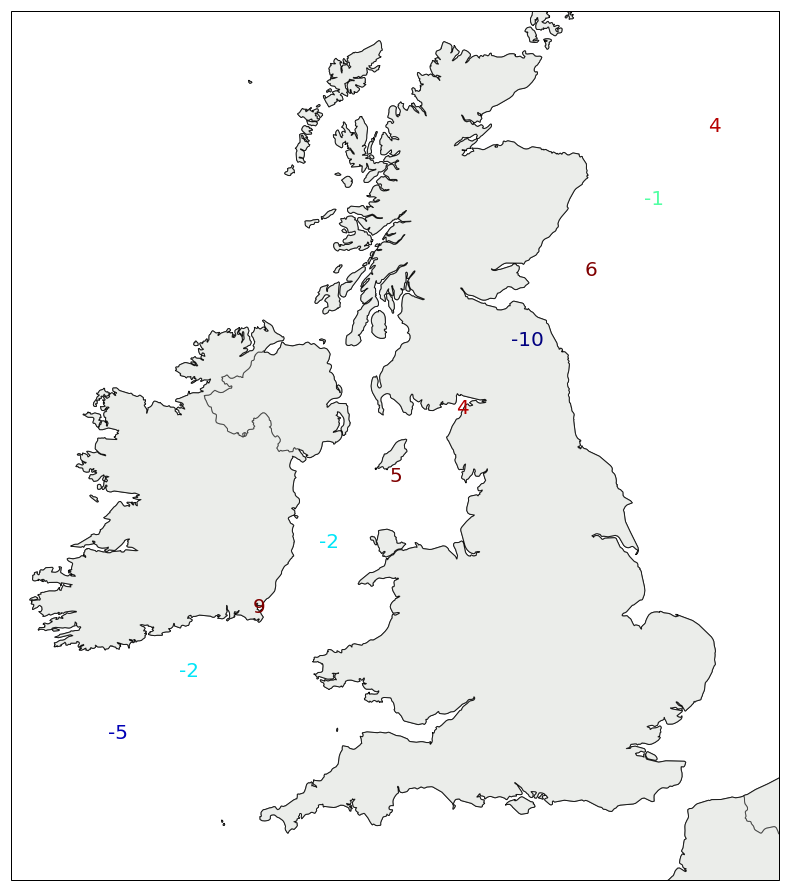

In [10]:
%%time
proj = ccrs.LambertConformal(central_longitude=13, central_latitude=47,
                             standard_parallels=[35])
fig = plt.figure(figsize=(20, 16))
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.set_extent((-10.1,1.8,50.1, 58.4))
state_boundaries = feat.NaturalEarthFeature(category='cultural',
                                            name='admin_0_countries',
                                            scale='10m',
                                            facecolor='#d8dcd6',
                                            alpha=0.5)
ax.coastlines(resolution='10m', zorder=1, color='black')
ax.add_feature(state_boundaries, zorder=1, edgecolor='black')


cm = 'jet'
cmap = matplotlib.cm.get_cmap(cm)
norm = matplotlib.colors.Normalize(vmin=-5.0, vmax=5.0)
# Start the station plot by specifying the axes to draw on, as well as the
# lon/lat of the stations (with transform). We also the fontsize to 12 pt.
index = 0
a = np.arange(-5, 5, 1)
for x in a:
    if index == 0:
        df_min = TT.loc[TT['Temperature'] < min(a)]
        df_max = TT.loc[TT['Temperature'] > max(a)]
        j = 0
        list_ex = [min(a)-5, max(a)+5]
        for arr in [df_min, df_max]:
            stationplot = StationPlot(ax, arr['lons'],
                                      arr['lats'], clip_on=True,
                                      transform=ccrs.PlateCarree(), fontsize=20)
            Temp = stationplot.plot_parameter('NW', arr['Temperature'],
                                              color=cmap(norm(list_ex[j])))
            j += 1
        
    # slice out values between x and x+1
    df_cur = TT.loc[(TT['Temperature'] < x+1) & (TT['Temperature'] >= x)]
    stationplot = StationPlot(ax, df_cur['lons'],
                              df_cur['lats'], clip_on=True,
                              transform=ccrs.PlateCarree(), fontsize=20)
    # plot the sliced values with a different color for each loop
    Temp = stationplot.plot_parameter('NW', df_cur['Temperature'],
                                      color=cmap(norm(x+0.5)))
    # print('x={} done correctly '.format(x))
    index += 1